# Recognizing Handwritten Digits on MNIST Dataset using KNN

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## STEP-1.Data Preparation

In [3]:
df=pd.read_csv('mnist_train-Copy1.csv')
data=df.values
print(data.shape)
print(type(data))
df.head(n=5)

(60000, 785)
<class 'numpy.ndarray'>


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X=data[:,1:]
Y=data[:,0]# not it;s a vector
print(X.shape,Y.shape)

(60000, 784) (60000,)


In [5]:
split=int(0.80*X.shape[0])
X_train=X[:split,:]
Y_train=Y[:split]
X_test,Y_test=X[split:,:],Y[split:]
print(X_test.shape,Y_test.shape)
print(X_train.shape,Y_train.shape)

(12000, 784) (12000,)
(48000, 784) (48000,)


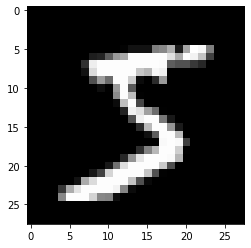

5


In [6]:
#Visualise SOme Samples

def drawImg(sample):
    img = sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()
    
drawImg(X_train[0])
print(Y_train[0])

## STEP 2: KNN

In [7]:
def dist(x1,x2):# x1 ,x2 are vector or array but of same data type
    return np.sqrt(sum((x1-x2)**2))

# Knn algo implementation

def knn(X,Y,query_x,k=5):
    m=X.shape[0]# total point are m
    vals=[]# empty list which contains tuples (dist,label)
    for i in range(m):#arrays are 0-indexed
        d=dist(X[i],query_x)
        vals.append((d,Y[i]))# (a,b)-> a tuple
    vals=sorted(vals)
    # one brute force way to traverse the vals and coumnt the no of 0's and 1's
    # another way s given below
    # convert it to 2-d array
    # but first slice this list
    # first K-nearest neighbours
    vals=vals[:k]
    vals=np.array(vals) # don't  use [] to create an array bcox vals already contains []
    #print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)# we only care about labels columns and unique provide an array 
    # of elements and their counts
    
    # 1st columns(0-inedxed) of new_val contain the count of 0,1 in soerted elements
    index = new_vals[1].argmax()# returns the index
    pred = new_vals[0][index]
    
    return pred # or return pred
    #print(new_vals)
        
    


## STEP 3: Make Predictions

In [8]:
pred = knn(X_train,Y_train,X_test[1])

print(int(pred))


7


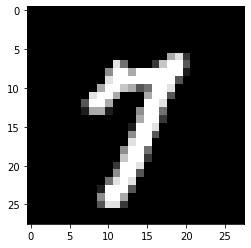

7


In [9]:
drawImg(X_test[1])
print(Y_test[1])

In [10]:
# NOTE-> Time Complexity -> O(N*Q)

In [11]:
df_test=pd.read_csv("test.csv")
#print(df_test.head())
test_mat=df_test.values
print(test_mat)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


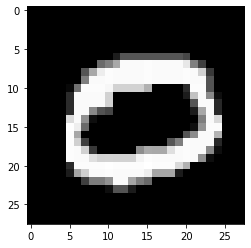

0
28000


In [12]:
drawImg(test_mat[1])
#print(Y_test[1])
pred = knn(X_train,Y_train,test_mat[1])

print(int(pred))
print(test_mat.shape[0])

In [13]:
print(test_mat.shape)

(28000, 784)


In [ ]:
m=test_mat.shape[0]
predictions=np.zeros((m,2))# matrix
for i in range(m):
    val=knn(X_train,Y_train,test_mat[i])
    predictions[i,0]=i+1
    predictions[i,1]=val
#prd=knn(X_test,Y_test,test_mat[2])
#print(prd)

In [16]:
predictions

array([[1., 2.],
       [2., 0.],
       [3., 9.],
       [4., 9.],
       [5., 3.]])

In [17]:
data_frame=pd.DataFrame(predictions,columns=["imagID","label"])
data_frame.to_csv("predict",index=False)